#### Trabajar con series de tiempo

Pandas se desarrolló en el contexto del modelado financiero, por lo que, como era de esperar, contiene un conjunto bastante extenso de herramientas para trabajar con fechas, horas y datos indexados por tiempo. Los datos de fecha y hora vienen en varios sabores, que discutiremos aquí:

Las marcas de tiempo hacen referencia a momentos particulares en el tiempo (por ejemplo, 4 de julio de 2015 a las 7:00 am).
Los intervalos de tiempo y los períodos hacen referencia a un período de tiempo entre un punto inicial y final en particular; por ejemplo, el año 2015. Los períodos suelen hacer referencia a un caso especial de intervalos de tiempo en los que cada intervalo tiene una duración uniforme y no se superpone (por ejemplo, períodos de 24 horas que comprenden días).
Los deltas de tiempo o duraciones hacen referencia a un período de tiempo exacto (por ejemplo, una duración de 22,56 segundos).
En esta sección, presentaremos cómo trabajar con cada uno de estos tipos de datos de fecha/hora en Pandas. Esta breve sección no es de ninguna manera una guía completa de las herramientas de series temporales disponibles en Python o Pandas, sino que pretende ser una descripción general amplia de cómo usted, como usuario, debe abordar el trabajo con series temporales. Comenzaremos con una breve discusión de las herramientas para manejar fechas y horas en Python, antes de pasar más específicamente a una discusión de las herramientas proporcionadas por Pandas. Después de enumerar algunos recursos que profundizan, revisaremos algunos ejemplos breves de cómo trabajar con datos de series temporales en Pandas.

### Fechas y horas en Python

El mundo de Python tiene varias representaciones disponibles de fechas, horas, deltas e intervalos de tiempo. Si bien las herramientas de series temporales proporcionadas por Pandas tienden a ser las más útiles para las aplicaciones de ciencia de datos, es útil ver su relación con otros paquetes utilizados en Python.

In [41]:
from datetime import datetime
import numpy as np
from dateutil import parser
import pandas as pd
from pandas_datareader import data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [6]:
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [7]:

date = parser.parse("4th of July, 2015")
date


datetime.datetime(2015, 7, 4, 0, 0)

In [8]:
date.strftime('%A')


'Saturday'

Fechas con Numpy

In [11]:

date = np.array('2015-07-04', dtype=np.datetime64)
date, date + np.arange(12)

(array('2015-07-04', dtype='datetime64[D]'),
 array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
        '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
        '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
       dtype='datetime64[D]'))

La principal diferencia entre time de python y numpy es la exactitud. Veamos un ejemplo en Numpy

In [12]:
np.datetime64('2015-07-04'), np.datetime64('2015-07-04 12:00'), np.datetime64('2015-07-04 12:59:59.50', 'ns')

(numpy.datetime64('2015-07-04'), numpy.datetime64('2015-07-04T12:00'))

### Fechas en Pandas. Lo mejor de Python build y numpy

In [15]:
date = pd.to_datetime("4th of July, 2015")
date, date.strftime('%A'), date + pd.to_timedelta(np.arange(12), 'D')

(Timestamp('2015-07-04 00:00:00'),
 'Saturday',
 DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
                '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
                '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
               dtype='datetime64[ns]', freq=None))

### Pandas Time Series: indexación por tiempo

In [17]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [18]:
data['2014-07-04':'2015-07-04'], data['2015']

(2014-07-04    0
 2014-08-04    1
 2015-07-04    2
 dtype: int64,
 2015-07-04    2
 2015-08-04    3
 dtype: int64)

### Estructuras de datos de series temporales de Pandas

Esta sección presentará las estructuras de datos fundamentales de Pandas para trabajar con datos de series temporales:

* Para las marcas de tiempo, Pandas proporciona el tipo de marca de tiempo. Como se mencionó anteriormente, es esencialmente un reemplazo para la fecha y hora nativa de Python, pero se basa en el tipo de datos numpy.datetime64 más eficiente. La estructura de índice asociada es DatetimeIndex.

* Para períodos de tiempo, Pandas proporciona el tipo de período. Esto codifica un intervalo de frecuencia fija basado en numpy.datetime64. La estructura de índice asociada es PeriodIndex.


* Para deltas de tiempo o duraciones, Pandas proporciona el tipo Timedelta. Timedelta es un reemplazo más eficiente para el tipo datetime.timedelta nativo de Python y se basa en numpy.timedelta64. La estructura de índice asociada es TimedeltaIndex

In [19]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Cualquier DatetimeIndex se puede convertir en un PeriodIndex con la función to_period() con la adición de un código de frecuencia; aquí usaremos 'D' para indicar la frecuencia diaria:


In [20]:
dates.to_period('D'), dates - dates[0]

(PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
              '2015-07-08'],
             dtype='period[D]'),
 TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None))

### Secuencias regulares: pd.date_range()
Para que la creación de secuencias de fechas regulares sea más conveniente, Pandas ofrece algunas funciones para este propósito: pd.date_range() para marcas de tiempo, pd.period_range() para períodos y pd.timedelta_range() para deltas de tiempo. Hemos visto que el rango() de Python y el np.arange() de NumPy convierten un punto de inicio, un punto final y un tamaño de paso opcional en una secuencia. De manera similar, pd.date_range() acepta una fecha de inicio, una fecha de finalización y un código de frecuencia opcional para crear una secuencia regular de fechas. Por defecto, la frecuencia es un día:

In [21]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [22]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [23]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [24]:
pd.period_range('2015-07', periods=8, freq='M')


PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [25]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

Además de esto, los códigos se pueden combinar con números para especificar otras frecuencias. Por ejemplo, para una frecuencia de 2 horas 30 minutos, podemos combinar los códigos de hora (H) y minuto (T) de la siguiente manera:

In [26]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [27]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())


DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

### Remuestreo, desplazamiento y creación de ventanas

La capacidad de usar fechas y horas como índices para organizar y acceder de manera intuitiva a los datos es una pieza importante de las herramientas de series temporales de Pandas. Los beneficios de los datos indexados en general (alineación automática durante las operaciones, división y acceso intuitivo de datos, etc.) aún se aplican, y Pandas proporciona varias operaciones adicionales específicas de series temporales.

Echaremos un vistazo a algunos de ellos aquí, usando algunos datos de precios de acciones como ejemplo. Debido a que Pandas se desarrolló principalmente en un contexto financiero, incluye algunas herramientas muy específicas para datos financieros. Por ejemplo, el paquete pandas-datareader que lo acompaña (instalable a través de conda install pandas-datareader), sabe cómo importar datos financieros de varias fuentes disponibles, incluidas Yahoo Finance, Google Finance y otras. Aquí cargaremos el historial de precios de cierre de Google:

In [36]:
goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


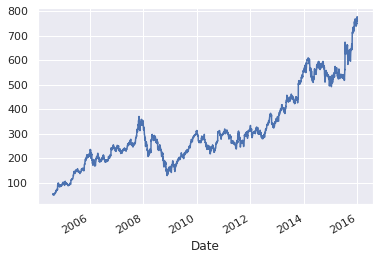

In [42]:
goog.plot();

### Remuestreo y conversión de frecuencias

Una necesidad común de datos de series temporales es volver a muestrear a una frecuencia más alta o más baja. Esto se puede hacer usando el método resample(), o el método mucho más simple asfreq(). La principal diferencia entre los dos es que resample() es fundamentalmente una agregación de datos, mientras que asfreq() es fundamentalmente una selección de datos.

Echando un vistazo al precio de cierre de Google, comparemos lo que devuelven los dos cuando reducimos la muestra de los datos. Aquí volveremos a muestrear los datos al final del año comercial:

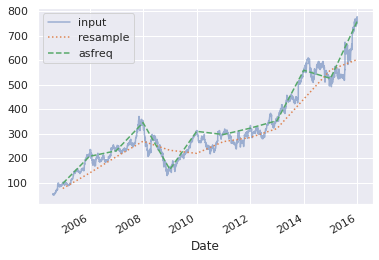

In [43]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Note la diferencia: en cada punto, resample reporta el promedio del año anterior, mientras que asfreq reporta el valor al final del año.

Para el muestreo ascendente, resample() y asfreq() son en gran medida equivalentes, aunque resample tiene muchas más opciones disponibles. En este caso, el valor predeterminado para ambos métodos es dejar vacíos los puntos muestreados, es decir, llenos con valores NA. Al igual que con la función pd.fillna() discutida anteriormente, asfreq() acepta un argumento de método para especificar cómo se imputan los valores. Aquí, volveremos a muestrear los datos de los días hábiles con una frecuencia diaria (es decir, incluidos los fines de semana):

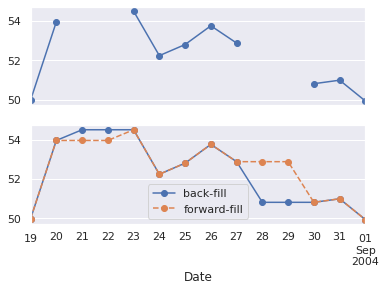

In [44]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

El panel superior es el predeterminado: los días no laborables se dejan como valores NA y no aparecen en el gráfico. El panel inferior muestra las diferencias entre dos estrategias para llenar los vacíos: relleno hacia adelante y relleno hacia atrás.

### Cambios de tiempo

Otra operación común específica de series de tiempo es el desplazamiento de datos en el tiempo. Pandas tiene dos métodos estrechamente relacionados para calcular esto: shift() y tshift() En resumen, la diferencia entre ellos es que shift() cambia los datos, mientras que tshift() cambia el índice. En ambos casos, el cambio se especifica en múltiplos de la frecuencia.

Aquí haremos shift() y tshift() por 900 días;

<ipython-input-45-b3e294b62dad>:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


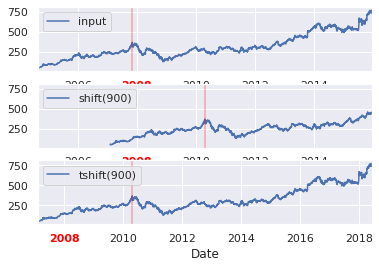

In [45]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

Vemos aquí que shift(900) desplaza los datos 900 días, desplazando parte de ellos del final del gráfico (y dejando los valores NA en el otro extremo), mientras que tshift(900) desplaza los valores del índice 900 días.

Un contexto común para este tipo de cambio es calcular las diferencias a lo largo del tiempo. Por ejemplo, usamos valores desplazados para calcular el retorno de la inversión de un año para las acciones de Google a lo largo del conjunto de datos:

<ipython-input-46-500c6c126989>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


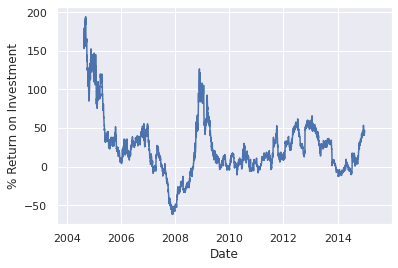

In [46]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

Esto nos ayuda a ver la tendencia general en las acciones de Google: hasta ahora, los momentos más rentables para invertir en Google han sido (como era de esperar, en retrospectiva) poco después de su salida a bolsa y en medio de la recesión de 2009.

### Ventanas enrollables

Las estadísticas continuas son un tercer tipo de operación específica de serie temporal implementada por Pandas. Esto se puede lograr a través del atributo rolling() de los objetos Series y DataFrame, que devuelve una vista similar a la que vimos con la operación groupby (consulte Agregación y agrupación). Esta vista continua pone a disposición una serie de operaciones de agregación de forma predeterminada.

Por ejemplo, aquí está la media móvil centrada en un año y la desviación estándar de los precios de las acciones de Google:

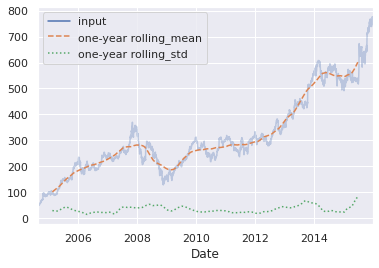

In [47]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

Al igual que con las operaciones de agrupación, los métodos de agregación() y de aplicación() se pueden usar para cálculos continuos personalizados. Referencia https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html